<a href="https://colab.research.google.com/github/Raed11998/Task3/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# تحميل البيانات
file_path = '/content/General_Education_School.csv'
data = pd.read_csv(file_path)
print(data.shape)
print(data.info())
print(data.head(10))

(1671, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   DBN                                1671 non-null   object
 1   School Name                        1671 non-null   object
 2   School Type                        1670 non-null   object
 3   Parent Response Rate               1671 non-null   object
 4   Teacher Response Rate              1671 non-null   object
 5   Student Response Rate              996 non-null    object
 6   Total Safety and Respect Score     1671 non-null   object
 7   Total Communication Score          1671 non-null   object
 8   Total Engagement Score             1671 non-null   object
 9   Total Academic Expectations Score  1671 non-null   object
dtypes: object(10)
memory usage: 130.7+ KB
None
      DBN                     School Name               School Type  \
0     d

In [2]:
# 1. التحليل الأولي (Exploratory Data Analysis)
# حساب عدد المدارس المشاركة
num_schools = data['DBN'].nunique()
# استخراج أنواع المدارس المختلفة
school_types = data['School Type'].unique()

# تصفية القيم الغير صالحة قبل التحويل
data['Parent Response Rate'] = pd.to_numeric(data['Parent Response Rate'].str.replace('%', '', regex=False), errors='coerce')
data['Teacher Response Rate'] = pd.to_numeric(data['Teacher Response Rate'].str.replace('%', '', regex=False), errors='coerce')
data['Student Response Rate'] = pd.to_numeric(data['Student Response Rate'].str.replace('%', '', regex=False), errors='coerce')

In [3]:
#تحويل درجات الأمان والتواصل إلى أرقام (وإزالة أي نصوص غير صالحة)
data['Total Safety and Respect Score'] = pd.to_numeric(data['Total Safety and Respect Score'], errors='coerce')
data['Total Communication Score'] = pd.to_numeric(data['Total Communication Score'], errors='coerce')

In [4]:

# حساب المتوسطات لنسب الاستجابة
response_avg = data[['Parent Response Rate', 'Teacher Response Rate', 'Student Response Rate']].mean()

In [5]:

# عرض النتائج الأولية
print(data.head(10))
print(f'عدد المدارس المشاركة: {num_schools}')
print(f'أنواع المدارس الموجودة: {school_types}')
print(f'متوسط نسب الاستجابة:\n{response_avg}')

      DBN                     School Name               School Type  \
0     dbn                    locationname                       NaN   
1  01M015       P.S. 015 Roberto Clemente         Elementary School   
2  01M019             P.S. 019 Asher Levy         Elementary School   
3  01M020            P.S. 020 Anna Silver         Elementary School   
4  01M034  P.S. 034 Franklin D. Roosevelt  Elementary/Middle School   
5  01M063       P.S. 063 William Mckinley         Elementary School   
6  01M064           P.S. 064 Robert Simon         Elementary School   
7  01M110   P.S. 110 Florence Nightingale         Elementary School   
8  01M134        P.S. 134 Henrietta Szold         Elementary School   
9  01M137      P.S. 137 John L. Bernstein         Elementary School   

   Parent Response Rate  Teacher Response Rate  Student Response Rate  \
0                   NaN                    NaN                    NaN   
1                  61.0                   92.0                    NaN   

In [6]:

# 2. نظافة البيانات (Data Cleaning)
# التحقق من القيم المفقودة في البيانات
missing_values = data.isnull().sum()
print(f'القيم المفقودة:\n{missing_values}')

القيم المفقودة:
DBN                                    0
School Name                            0
School Type                            1
Parent Response Rate                   1
Teacher Response Rate                  1
Student Response Rate                676
Total Safety and Respect Score         1
Total Communication Score              1
Total Engagement Score                 0
Total Academic Expectations Score      0
dtype: int64


In [7]:

# حذف الأعمدة الغير ضرورية (مثل DBN )
data_cleaned = data.drop(columns=['DBN'])

In [8]:

# عرض الأعمدة بعد التنظيف
print(f'الأعمدة بعد التنظيف:\n{data_cleaned.columns}')

الأعمدة بعد التنظيف:
Index(['School Name', 'School Type', 'Parent Response Rate',
       'Teacher Response Rate', 'Student Response Rate',
       'Total Safety and Respect Score', 'Total Communication Score',
       'Total Engagement Score', 'Total Academic Expectations Score'],
      dtype='object')


In [9]:
print(data_cleaned.head(10))

                      School Name               School Type  \
0                    locationname                       NaN   
1       P.S. 015 Roberto Clemente         Elementary School   
2             P.S. 019 Asher Levy         Elementary School   
3            P.S. 020 Anna Silver         Elementary School   
4  P.S. 034 Franklin D. Roosevelt  Elementary/Middle School   
5       P.S. 063 William Mckinley         Elementary School   
6           P.S. 064 Robert Simon         Elementary School   
7   P.S. 110 Florence Nightingale         Elementary School   
8        P.S. 134 Henrietta Szold         Elementary School   
9      P.S. 137 John L. Bernstein         Elementary School   

   Parent Response Rate  Teacher Response Rate  Student Response Rate  \
0                   NaN                    NaN                    NaN   
1                  61.0                   92.0                    NaN   
2                  92.0                   94.0                    NaN   
3             

In [10]:

# 3. التحليل العميق (Deep Dive)
# حساب العلاقة بين نسبة استجابة الأهل ودرجات الأمان والتواصل
correlation = data_cleaned[['Parent Response Rate', 'Total Safety and Respect Score', 'Total Communication Score']].corr()
print(f'العلاقة بين استجابة الأهل والأمان والتواصل:\n{correlation}')

العلاقة بين استجابة الأهل والأمان والتواصل:
                                Parent Response Rate  \
Parent Response Rate                        1.000000   
Total Safety and Respect Score              0.499228   
Total Communication Score                   0.476736   

                                Total Safety and Respect Score  \
Parent Response Rate                                  0.499228   
Total Safety and Respect Score                        1.000000   
Total Communication Score                             0.848642   

                                Total Communication Score  
Parent Response Rate                             0.476736  
Total Safety and Respect Score                   0.848642  
Total Communication Score                        1.000000  


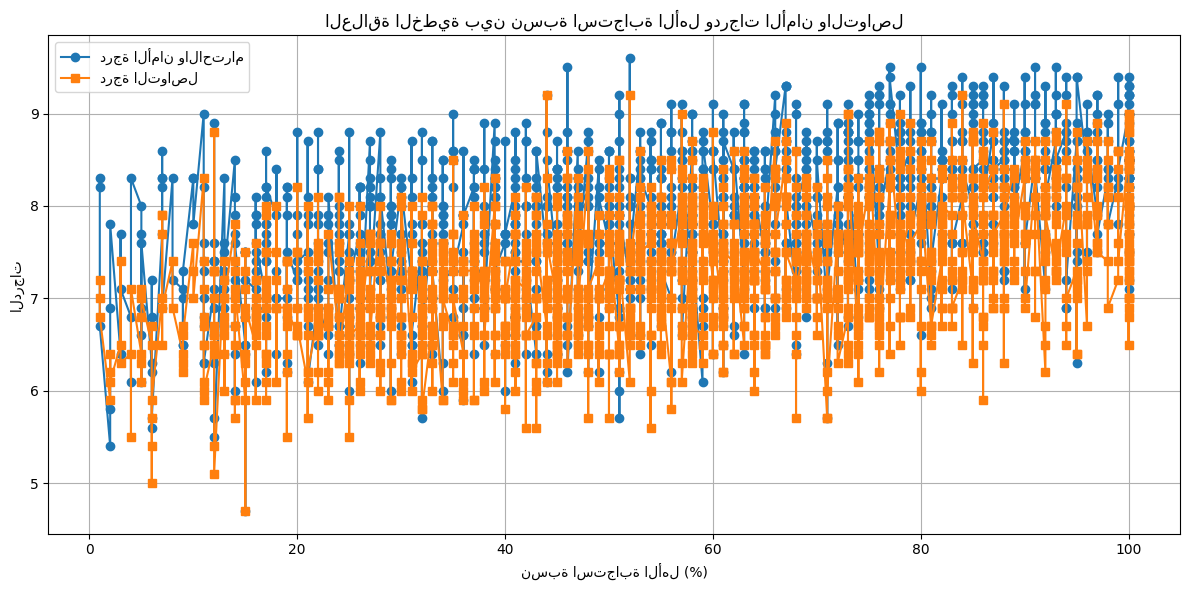

In [11]:


import matplotlib.pyplot as plt

# ترتيب البيانات حسب نسبة استجابة الأهل
data_sorted = data_cleaned.sort_values('Parent Response Rate')

# رسم الخطوط
plt.figure(figsize=(12, 6))
plt.plot(data_sorted['Parent Response Rate'], data_sorted['Total Safety and Respect Score'], label='درجة الأمان والاحترام', marker='o')
plt.plot(data_sorted['Parent Response Rate'], data_sorted['Total Communication Score'], label='درجة التواصل', marker='s')

# إعدادات الشكل
plt.title('العلاقة الخطية بين نسبة استجابة الأهل ودرجات الأمان والتواصل')
plt.xlabel('نسبة استجابة الأهل (%)')
plt.ylabel('الدرجات')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:

# العثور على المدارس ذات الدرجات الاستثنائية (أعلى من 9 أو أقل من 5)
outlier_schools = data_cleaned[(data_cleaned['Total Safety and Respect Score'] > 9) | (data_cleaned['Total Safety and Respect Score'] < 5)]
print(f'المدارس الاستثنائية (الدرجات العليا أو السفلى):\n{outlier_schools}')

المدارس الاستثنائية (الدرجات العليا أو السفلى):
                                        School Name             School Type  \
43              P.S. 059 Beekman Hill International       Elementary School   
52                        P.S. 130 Hernando De Soto       Elementary School   
55                       Yorkville Community School  Early Childhood School   
66                                         P.S. 267  Early Childhood School   
70                    P.S. 290 Manhattan New School       Elementary School   
...                                             ...                     ...   
1641                         Icahn Charter School 2       Elementary School   
1648        Bronx Academy Of Promise Charter School       Elementary School   
1652  Girls Preparatory Charter School Of The Bronx  Early Childhood School   
1656         Bronx Success Academy Charter School 2  Early Childhood School   
1657                         Icahn Charter School 4       Elementary School   

   

<ipython-input-13-b8c18b4f1c19>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Score', y='School Name', data=high_score_schools_sorted, palette='Greens_d')


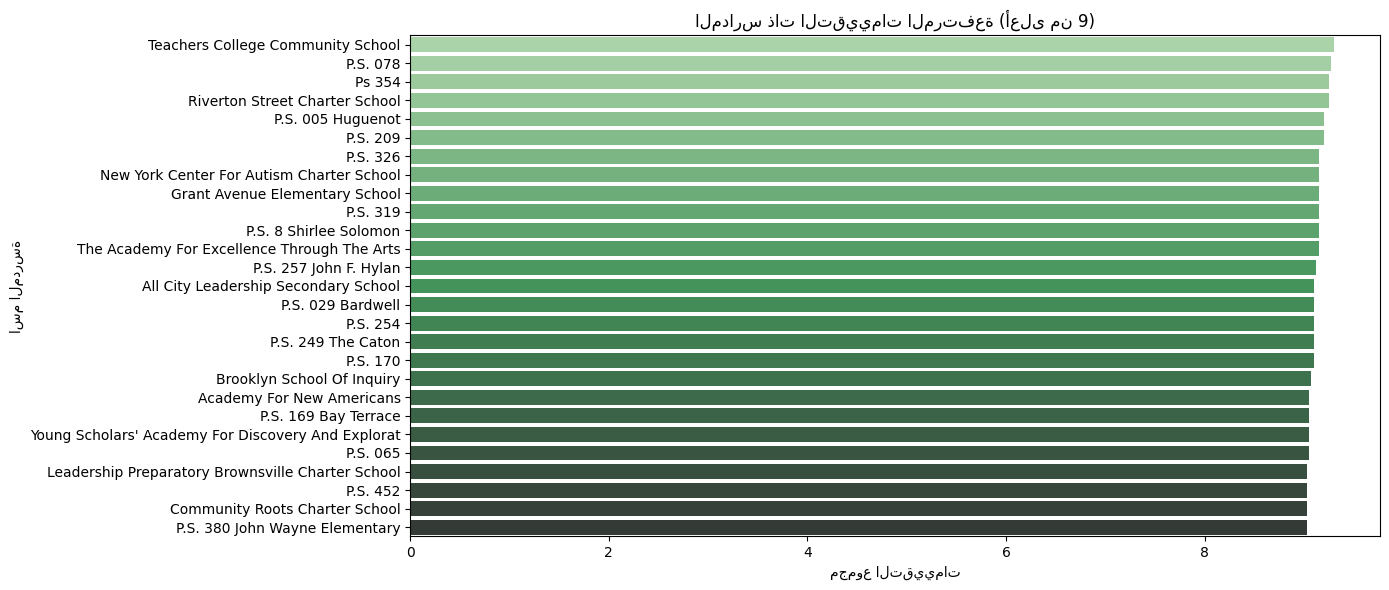

In [13]:




# تنظيف أسماء الأعمدة من الفراغات
data_cleaned.columns = data_cleaned.columns.str.strip()

# تعريف الأعمدة الخاصة بالتقييمات
score_columns = [
    'Total Safety and Respect Score',
    'Total Communication Score',
    'Total Engagement Score',
    'Total Academic Expectations Score'
]

# تحويل الأعمدة إلى أرقام
for col in score_columns:
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')

# حساب متوسط التقييم لكل مدرسة
data_cleaned['Total Score'] = data_cleaned[score_columns].mean(axis=1)

# استخراج المدارس ذات التقييمات العالية فقط (أعلى من 9)
high_score_schools = data_cleaned[data_cleaned['Total Score'] > 9]

# ترتيب المدارس تنازليًا حسب التقييم
high_score_schools_sorted = high_score_schools.sort_values(by='Total Score', ascending=False)

# رسم الرسم البياني
plt.figure(figsize=(14, 6))
sns.barplot(x='Total Score', y='School Name', data=high_score_schools_sorted, palette='Greens_d')

plt.title('المدارس ذات التقييمات المرتفعة (أعلى من 9)')
plt.xlabel('مجموع التقييمات')
plt.ylabel('اسم المدرسة')
plt.tight_layout()
plt.show()

<ipython-input-19-e803c7384a7b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = data_cleaned[col].str.replace('%', '').astype(float)
<ipython-input-19-e803c7384a7b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = data_cleaned[col].str.replace('%', '').astype(float)


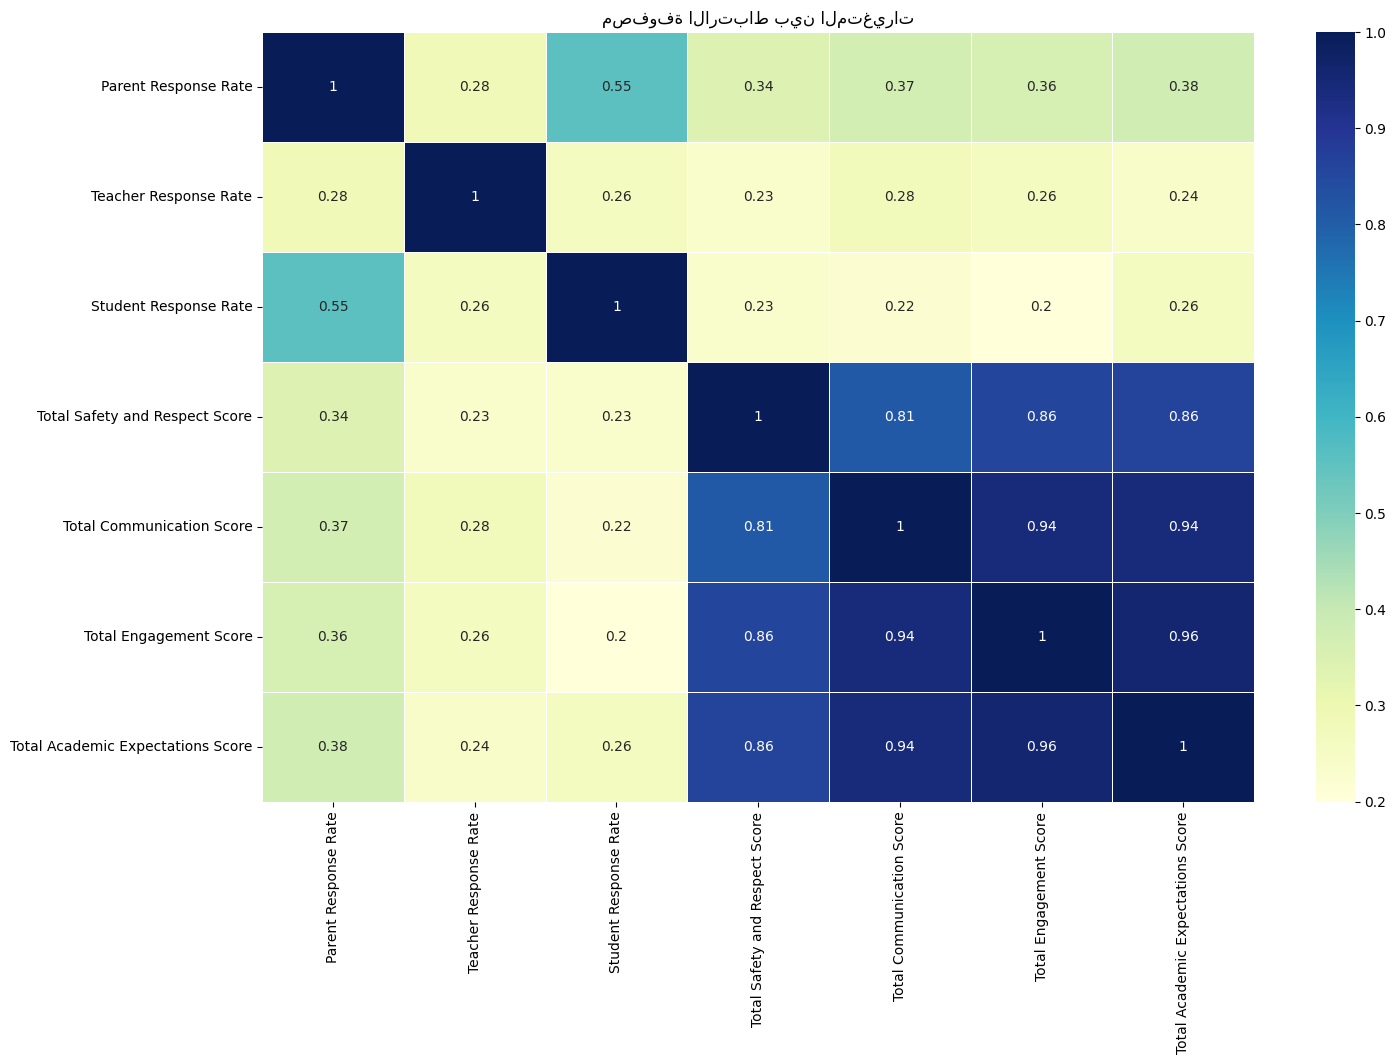

In [19]:
#Correlation

# حذف القيم الفارغة حتى لا تؤثر على التحليل
data_cleaned = data.dropna()

# تحويل جميع الأعمدة التي تحتوي على قيم رقمية بشكل خاطئ (مثل "60%") إلى أرقام إن لم تكن قد نُظّفت سابقاً
for col in data_cleaned.columns:
    if data_cleaned[col].dtype == 'object':
        try:
            data_cleaned[col] = data_cleaned[col].str.replace('%', '').astype(float)
        except:
            pass  # تجاهل الأعمدة غير القابلة للتحويل

# استخراج فقط الأعمدة الرقمية
numeric_df = data_cleaned.select_dtypes(include=['float64', 'int64'])

# حساب مصفوفة الارتباط
correlation_matrix = numeric_df.corr()

# رسم خريطة الارتباطات (heatmap)
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("مصفوفة الارتباط بين المتغيرات")
plt.show()

In [ ]:


#  حساب المتوسطات
average_parent_response = data_cleaned['Parent Response Rate'].mean()
average_teacher_response = data_cleaned['Teacher Response Rate'].mean()
average_student_response = data_cleaned['Student Response Rate'].mean()

#  تحليل نقاط القوة والضعف
def analyze_strengths_weaknesses(data_cleaned):
    strengths = []
    weaknesses = []

    # نقاط القوة
    if average_teacher_response > 85:
        strengths.append("نسبة استجابة المعلمين مرتفعة، مما يعكس تفاعلهم الجيد مع العملية التعليمية.")
    if average_student_response > 80:
        strengths.append("نسبة استجابة الطلاب جيدة، مما يدل على اهتمامهم بالبيئة التعليمية.")

    # نقاط الضعف
    if average_parent_response < 60:
        weaknesses.append("نسبة استجابة الأهل منخفضة، مما قد يشير إلى نقص في التواصل بين المدرسة والأهل.")
    if data_cleaned['Total Safety and Respect Score'].mean() < 7:
        weaknesses.append("درجات الأمان منخفضة في بعض المدارس، مما يتطلب تحسين بيئة الأمان داخل المدارس.")
    if data_cleaned['Total Communication Score'].mean() < 7:
        weaknesses.append("درجات التواصل بين المدرسة والمجتمع المحلي منخفضة، يجب تحسين قنوات التواصل.")

    return strengths, weaknesses

#  استدعاء الوظيفة
strengths, weaknesses = analyze_strengths_weaknesses(data_cleaned)

#  طباعة النقاط القوية والضعيفة
print("النقاط القوية:")
for strength in strengths:
    print(f"- {strength}")

print("\nالنقاط الضعيفة:")
for weakness in weaknesses:
    print(f"- {weakness}")